# Notebook 1 to play with differential equations


- Author : G. Sainton
- Date: 05/2020
- Version : 1.0


## First order 

$$y'(t)  + ay(t) + b = 0$$ 

We have to first rewrite the equation with the shape $y'(t)=f(t,y(t))$

We'll consider first-order ordinary differential equations with an imposed initial condition initial condition (Cauchy problem).
The Cauchy problem is defined by the solution of the differential equation as follows : 

$$\begin{equation}
  \begin{cases}
    y'(t)=-af(t)-b, \\
    y(t_0)=y_0
  \end{cases}
\end{equation}$$

The equation is then solved with the function `solve_ivp` in `scipy.integrate library`. Where ivp stand for initial value problem


![solve_ivp][def]


[def]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

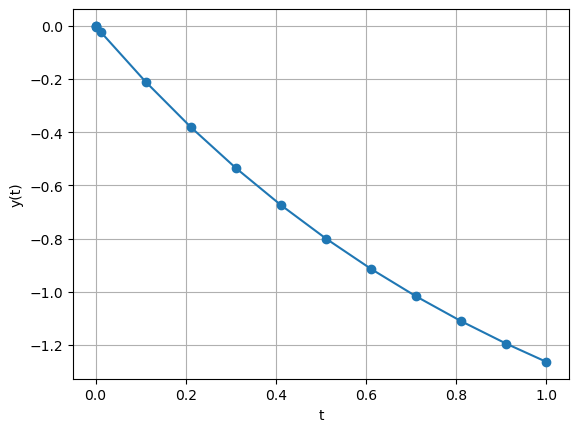

In [1]:
# First order ODEs

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def equation(t, y):
    # dy/dt = -ay - b with the Cauchy condition y(0) = y0
    
    a = 1
    b = 2
    return -a*y-b 


# Some random initial conditions
t0 = 0
tf = 1
y0 = 0

# Solve the ODE
solution = solve_ivp(equation, [t0, tf], [y0], max_step=0.1)

# Plot the solution
plt.plot(solution.t, solution.y[0], 'o-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

## Here is an example with an electric RC circuit

<img src="./images/Equadiff/CircuitRC.png" >

Equation can be written as follow : $u(t)+Ri(t)=U$

but current is related to capacitor charge by the equation $i(t)=\frac{dq}{dt}=C\frac{du(t)}{dt}$ 

Then the first equation become : $U = u(t)+RC\frac{du(t)}{dt}$

Rewrite this equation as a Cauchy problem : $\frac{du(t)}{dt} = \frac{U-u(t)}{RC}$

Assuming that at $t=0$, $u(0)=0$, no capacitor charge at start.

Let's define some constants for this problem : 

- $U = 5 V$
- $R = 10\Omega$
- $C = 10^{-2} F$




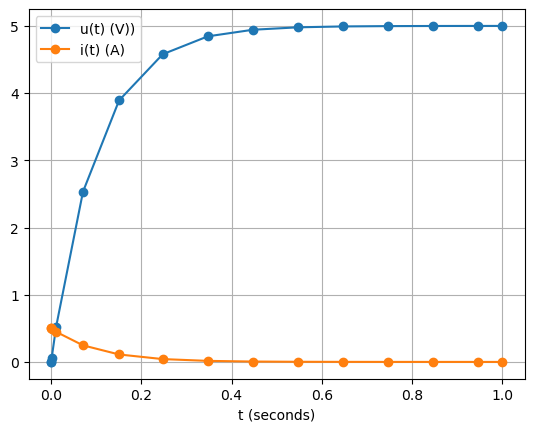

In [2]:
from scipy.integrate import solve_ivp
import numpy as np

U = 5
R = 10
C = 0.01

def equation(t, u):
    return (U-u)/(R*C)

t0 = 0
tf = 1
u0 = 0

tension = solve_ivp(equation, [t0, tf], [u0], max_step=0.1)
current = (U-tension.y[0])/R

# Plot the solution
plt.plot(tension.t, tension.y[0], 'o-', label='u(t) (V))')
plt.plot(tension.t, current, 'o-', label='i(t) (A)')
plt.xlabel('t (seconds)')
plt.grid()
plt.legend()
plt.show()

## Second order differential equation


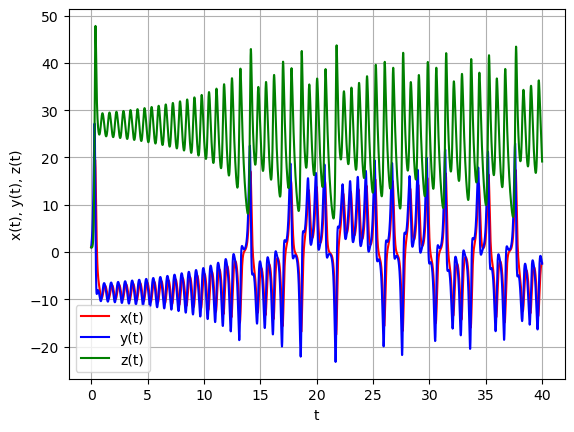

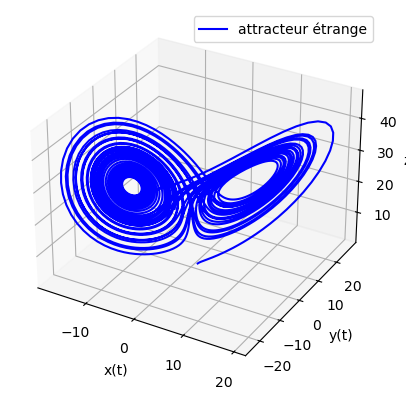

In [3]:
sigma = 10
rho = 28
beta = 8/3

x0 = 1
y0 = 1
z0 = 1

def equation(t, Y, sigma, rho, beta):
    x= Y[0]
    y = Y[1]
    z = Y[2]

    dxdt = sigma*(y-x)
    dydt = x*(rho-z)-y
    dzdt = x*y-beta*z

    return [dxdt, dydt, dzdt]

solution = solve_ivp(equation, [0, 40], [x0, y0, z0], method='RK45',
                     args=(sigma, rho, beta), max_step=0.01)

x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

plt.plot(solution.t, x, 'r-', label='x(t)')
plt.plot(solution.t, y, 'b-', label='y(t)')
plt.plot(solution.t, z, 'g-', label='z(t)')

plt.xlabel('t')
plt.ylabel('x(t), y(t), z(t)')
plt.grid()
plt.legend()

plt.show()

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'b-', label='attracteur étrange')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.legend()
plt.show()


See Notebook 2 for Zombies attacks... 